In [9]:
import numpy as np
from __future__ import print_function

In [3]:
h = [2, 1, 0]
x = [3, 4, 5]

y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

In [5]:
x = [6, 2]
h = [1,2,5,4]

y = np.convolve(x, h, "full")
y

array([ 6, 14, 34, 34,  8])

In [6]:
x = [6, 2]
h = [1,2,5,4]

y = np.convolve(x, h, "same")
y

array([ 6, 14, 34, 34])

In [7]:
x = [6, 2]
h = [1,2,5,4]

y = np.convolve(x, h, "valid")
y

array([14, 34, 34])

In [3]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,1]]

print sg.convolve(I, g, 'valid')
      
print sg.convolve(I, g)

[[248   4]
 [-28 236]
 [  2 -14]]
[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [4]:
I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,1],
    [2, 3],]

print sg.convolve(I, g, 'full')
print sg.convolve(I, g, 'same')
print sg.convolve(I, g, 'valid')

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]]
[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]]
[[ 751  263]
 [1118  714]]


In [15]:
import tensorflow as tf

input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding = 'VALID')
op2 = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding = 'SAME')

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print('Input: \n')
    print('{0} \n' .format(input.eval()))
    print('Filter: \n')
    print('{0} \n' .format(filter.eval()))
    print('Valid Conv: \n')
    print(sess.run(op))
    print('Same Conv: \n')
    print(sess.run(op2))

Input: 

[[[[ 0.25068346]
   [-1.27376747]
   [ 0.03400535]
   [-2.05561519]
   [ 0.93674803]
   [-1.37949133]
   [-0.84240109]
   [ 0.77439696]
   [-0.35867319]
   [-1.16605866]]

  [[ 0.2891238 ]
   [-0.20448045]
   [ 1.18459857]
   [-1.07625449]
   [-0.06422701]
   [-0.10524557]
   [-1.20794833]
   [ 1.19696534]
   [-0.28248772]
   [-0.23694348]]

  [[ 1.50324535]
   [ 1.43093812]
   [ 1.23457086]
   [-0.32527381]
   [-1.68500328]
   [ 0.98461074]
   [-0.69027919]
   [ 0.79936272]
   [-0.28393799]
   [ 1.772627  ]]

  [[ 1.8182677 ]
   [ 0.13389342]
   [ 0.00771736]
   [ 0.51972973]
   [-1.7725153 ]
   [ 2.00989151]
   [ 0.5320037 ]
   [-0.38620031]
   [-1.38224769]
   [-0.74385267]]

  [[-0.73769307]
   [-0.8572728 ]
   [-1.20408738]
   [ 0.53074449]
   [-0.29169309]
   [ 1.64668953]
   [ 1.75305319]
   [ 0.50602239]
   [-0.30016059]
   [ 1.56409121]]

  [[-1.37590575]
   [ 1.06109178]
   [ 0.91072273]
   [-2.13053322]
   [ 0.60918653]
   [-0.25427923]
   [ 0.32057998]
   [ 0.86564

In [16]:
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7F371C1F6390> 


After conversion to numerical representation: 

 array([[ 64,  71,  64, ...,  49,  47,  48],
       [ 68,  71,  63, ...,  53,  52,  51],
       [ 65,  69,  65, ...,  54,  50,  55],
       ..., 
       [ 21,  23,  22, ..., 184, 170, 154],
       [ 17,  20,  26, ..., 179, 165, 152],
       [ 26,  22,  21, ..., 170, 159, 148]], dtype=uint8)

 Input image converted to gray scale: 



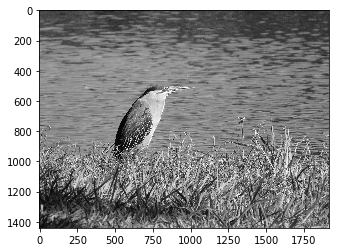

In [20]:
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

#raw = raw_input()
raw = 'bird.jpg'

im = Image.open(raw)

image_gr = im.convert("L")
print("\n Original type: %r \n\n" % image_gr)

arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr) 

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [21]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

grad = sg.convolve2d(arr, kernel, mode = 'same', boundary= 'symm')

GRADIENT MAGNITUDE - Feature map


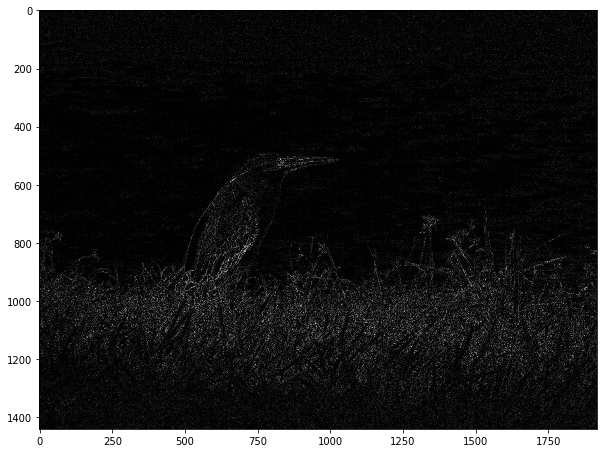

In [22]:
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [23]:
type(grad)
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


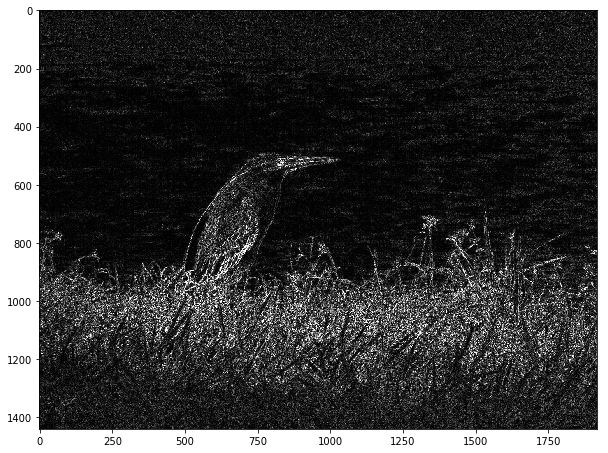

In [24]:
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')